# Reservas de Hotel

### Definicion de Objetivo y Contexto Comercial
Este conjunto de datos de reservas de hotel contiene informacion sobre los precios promedios de las habitaciones y de las reservas; el numero de reservas anteriores canceladas por el cliente; fechas de ingreso y salida; el tipo de habitacion; plaza de aparcamiento; plan de comidas, etc. Las razones tipicas de las cancelaciones incluyen varios factores, a veces se facilita con la opcion de hacerlo gratis o a un bajo costo, que es beneficioso para el cliente pero no asi para los hoteles. ¿Se podrá predecir si el cliente cumplirá o cancelará la reserva? 

El objetivo general de este analisis es crear un modelo de ML para predecir si un usuario cancelará o no una reserva de hotel y sacar conclusiones a partir de esa posibilidad.


### Contexto Analitico
El conjunto de datos contiene información sobre 36.275 reservas de hotel, incluidas las que se cancelaron. Se trata de información real, por lo que se eliminaron todos los elementos que pudieran identificar a hoteles o clientes.


### Variables

Booking_ID: identificador unico de cada reserva

no_of_adults: Numero de adultos

no_of_children: Numero de niños

no_of_weekend_nights: Número de noches de fin de semana (sábado o domingo) que el huésped se alojó o reservó para alojarse en el hotel.

no_of_week_nights: Número de noches entre semana (de lunes a viernes) que el cliente se alojó o reservó en el hotel

type_of_meal_plan: Tipo de plan de comidas reservado por el cliente:

required_car_parking_space : ¿Necesita el cliente una plaza de aparcamiento? (0 - No, 1- Sí)

room_type_reserved: Tipo de habitación reservada por el cliente. Los valores son cifrados (codificados) por INN Hotels.

lead_time: Número de días entre la fecha de reserva y la fecha de llegada

arrival_year : Año de la fecha de llegada

arrival_month: Mes de la fecha de llegada

arrival_date: Fecha del mes

market_segment_type: Denominación del segmento de mercado.

repeated_guest: ¿El cliente es un huésped repetido? (0 - No, 1- Sí)

no_of_previous_cancellations: Número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual.

no_of_previous_bookings_not_canceled: Número de reservas anteriores no canceladas por el cliente antes de la reserva actual

avg_price_per_room: Precio medio por día de la reserva; los precios de las habitaciones son dinámicos. (en euros)

no_of_special_requests: Número total de peticiones especiales realizadas por el cliente (por ejemplo, piso alto, vistas desde la habitación, etc.)

booking_status: indica si la reserva fue cancelada o no.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data.csv")
data_df = pd.DataFrame(data)

In [3]:
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

None

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [4]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

# EDA (Analisis Exploratorio de Datos)

## Booking Status (variable objetivo)

### Univariado

In [44]:
booking_status_data = data['booking_status']

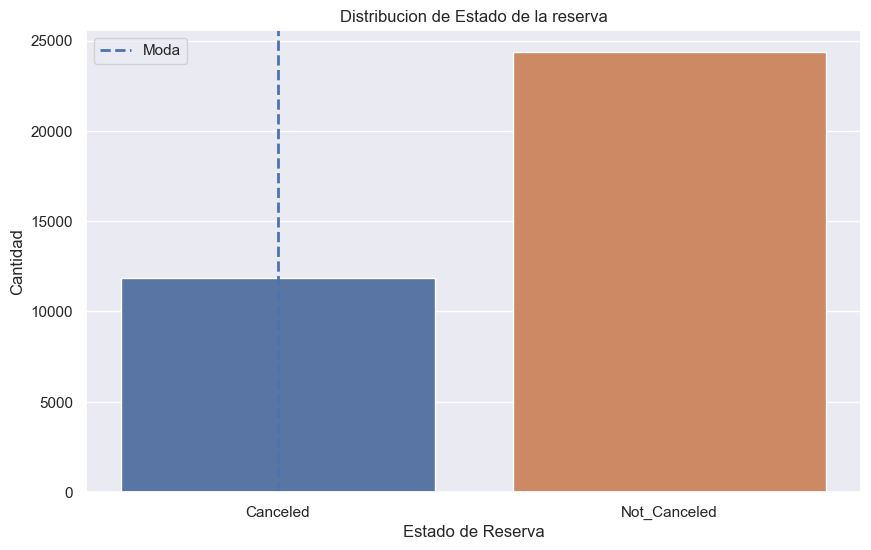

In [70]:

# Creamos countplot
sns.countplot(x='booking_status', data=data)
plt.xlabel('Estado de Reserva')
plt.ylabel('Cantidad')
plt.title('Distribucion de Estado de la reserva')

# medida de tendencia central
mode_val = data['booking_status'].mode().values[0]

# Agregamos al gráfico
plt.axvline(mode_val, color='b', linestyle='dashed', linewidth=2, label='Moda')

# Leyenda
plt.legend()

# Mostrar gráfico
plt.show()

In [69]:
# Calculamos el conteo de categorías en la columna 'booking_status'
booking_status_counts = data['booking_status'].value_counts()


print(booking_status_counts)

Not_Canceled    24360
Canceled        11878
Name: booking_status, dtype: int64


## Estado de la Reserva vs Mes de llegada

### Bivariado

El gráfico de barras con las variables 'arrival_month' y 'booking_status' permite visualizar la distribución de las reservas por mes de llegada y comparar los estados de reserva (cancelado y no cancelado) en cada mes. Esto puede ayudar a identificar patrones estacionales y evaluar la relación entre el mes de llegada y la probabilidad de cancelación de las reservas.

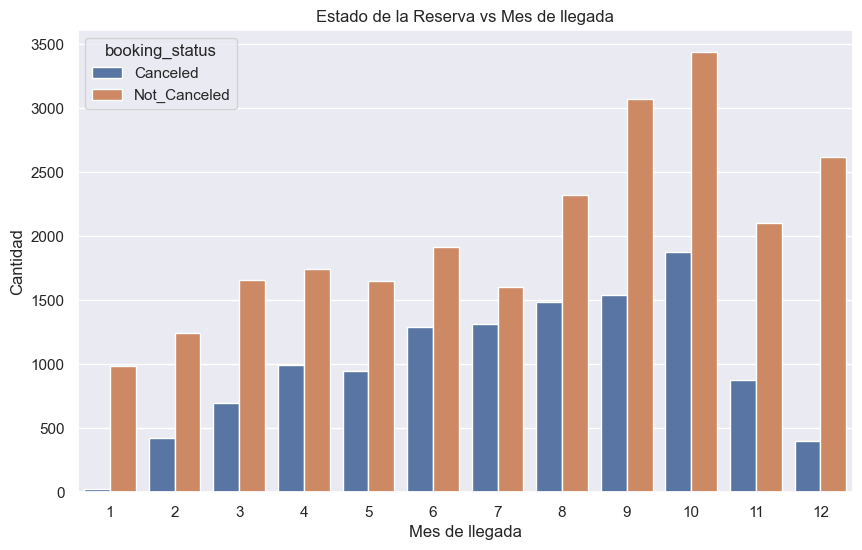

In [74]:

# Creamos gráfico de barras apiladas
sns.set(rc={'figure.figsize': (10, 6)})  
sns.countplot(x='arrival_month', hue='booking_status', data=data)
plt.xlabel('Mes de llegada')
plt.ylabel('Cantidad')
plt.title('Estado de la Reserva vs Mes de llegada')


plt.show()

 Podemos observar que hay meses en los que la proporción de reservas canceladas es más alta en comparación con los meses con una proporción más alta de reservas no canceladas. Esto puede indicar una estacionalidad en las cancelaciones de reservas durante ciertos meses.

In [73]:
print(data.columns)

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')


### Segmento de Mercado vs Estado de la Reserva

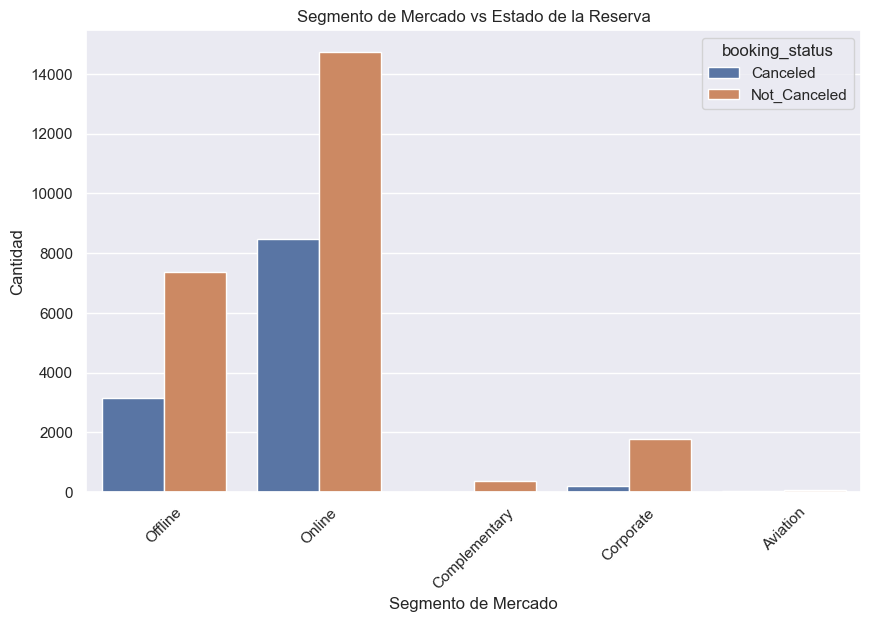

In [88]:
# Creamos columna 'market_segment_type' combinando las características relacionadas
data['market_segment_type'] = data[
    ['market_segment_type_Aviation', 'market_segment_type_Complementary', 'market_segment_type_Corporate',
     'market_segment_type_Offline', 'market_segment_type_Online']
].idxmax(axis=1).str.split('_', expand=True)[3]

# Sumamos las cantidades de 'booking_status' para cada categoría de 'market_segment_type'
segment_booking_counts = data.groupby('market_segment_type')['booking_status'].value_counts().unstack().fillna(0)

# Ordenamos según el orden 'Not_Canceled', 'Canceled'
segment_booking_counts = segment_booking_counts[['Not_Canceled', 'Canceled']]


# Creamos grafico
sns.set(rc={'figure.figsize': (10, 6)})  # Aumentar el tamaño de la figura
sns.countplot(x='market_segment_type', hue='booking_status', data=data)
plt.xlabel('Segmento de Mercado')
plt.ylabel('Cantidad')
plt.title('Segmento de Mercado vs Estado de la Reserva')
plt.xticks(rotation=45)
plt.show()

Al observar la distribución de las barras, podemos identificar que hay segmentos de mercado que tienden a tener una proporción más alta de reservas canceladas en comparación con otros. Esto puede indicar que ciertos segmentos de mercado son más propensos a cancelar reservas y pueden requerir una atención o estrategias de gestión específicas.

### Plan de Comidas vs Estado de la Reserva

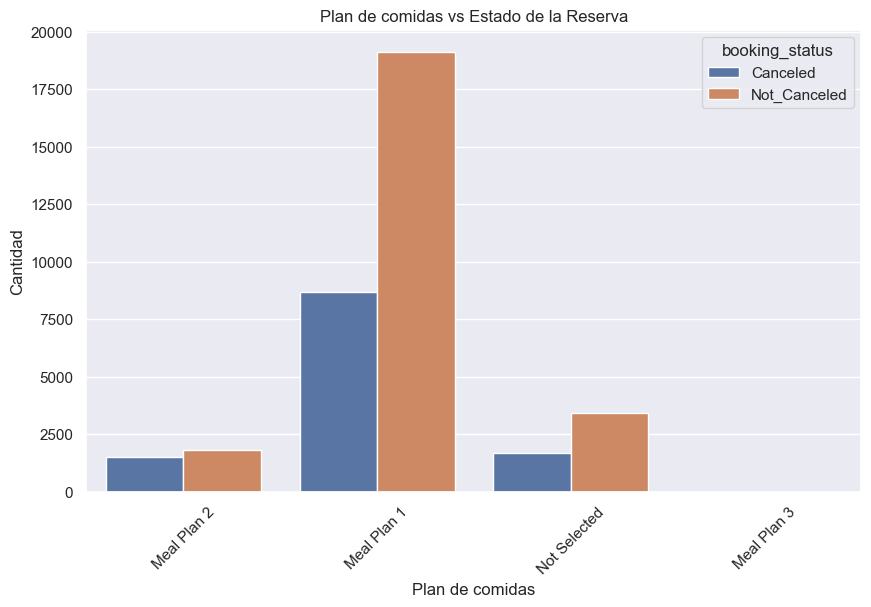

In [90]:
# Creamos una columna 'type_of_meal_plan' combinando las características relacionadas
data['type_of_meal_plan'] = data[
    ['type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
     'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected']
].idxmax(axis=1).str.split('_', expand=True)[4]

# Sumamos las cantidades de 'booking_status' para cada categoría de 'type_of_meal_plan'
meal_plan_booking_counts = data.groupby('type_of_meal_plan')['booking_status'].value_counts().unstack().fillna(0)

meal_plan_booking_counts = meal_plan_booking_counts[['Not_Canceled', 'Canceled']]

sns.set(rc={'figure.figsize': (10, 6)})  # Aumentar el tamaño de la figura
sns.countplot(x='type_of_meal_plan', hue='booking_status', data=data)
plt.xlabel('Plan de comidas')
plt.ylabel('Cantidad')
plt.title('Plan de comidas vs Estado de la Reserva')
plt.xticks(rotation=45)
plt.show()

### Tipo de Hab. Reservada vs Estado de la Reserva

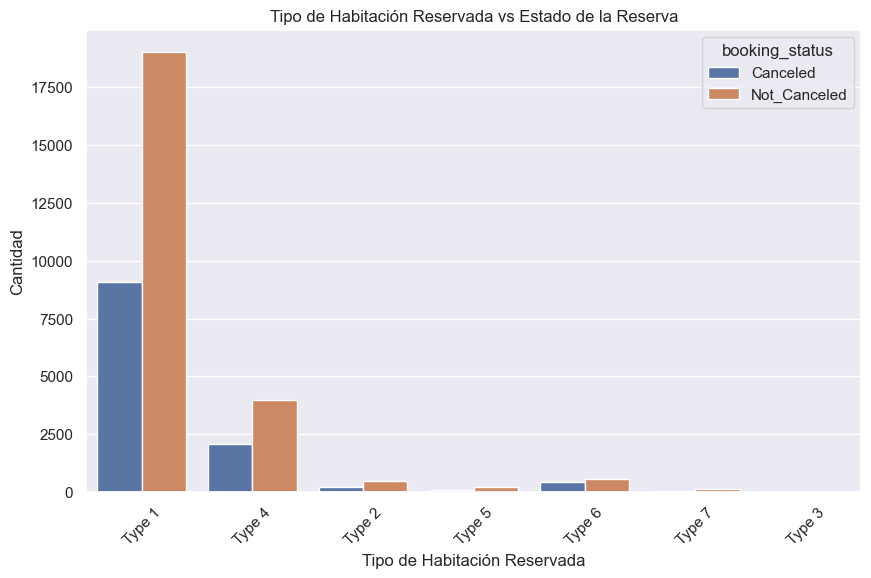

In [93]:
# Creamos una columna 'room_type_reserved' combinando las características relacionadas
data['room_type_reserved'] = data[
    ['room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
     'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
     'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
     'room_type_reserved_Room_Type 7']
].idxmax(axis=1).str.split('_', expand=True)[4]

# Sumamos las cantidades de 'booking_status' para cada categoría de 'room_type_reserved'
room_type_booking_counts = data.groupby('room_type_reserved')['booking_status'].value_counts().unstack().fillna(0)

room_type_booking_counts = room_type_booking_counts[['Not_Canceled', 'Canceled']]

sns.set(rc={'figure.figsize': (10, 6)})  # Aumentar el tamaño de la figura
sns.countplot(x='room_type_reserved', hue='booking_status', data=data)
plt.xlabel('Tipo de Habitación Reservada')
plt.ylabel('Cantidad')
plt.title('Tipo de Habitación Reservada vs Estado de la Reserva')
plt.xticks(rotation=45)
plt.show()

### Año de Llegada vs Precio Promedio por Hab.

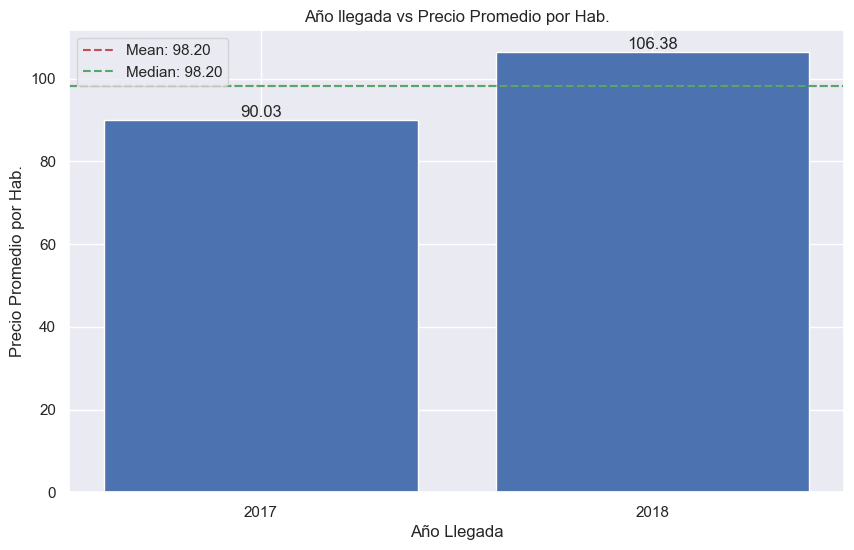

In [95]:


# Calcular la media y la mediana del precio promedio por habitación
mean_value = np.mean(year_avg_price.values)
median_value = np.median(year_avg_price.values)

bars = plt.bar(year_avg_price.index.astype(int), year_avg_price.values)
plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axhline(y=median_value, color='g', linestyle='--', label=f'Median: {median_value:.2f}')
plt.legend()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom')

plt.xlabel('Año Llegada')
plt.xticks(year_avg_price.index.astype(int))
plt.ylabel('Precio Promedio por Hab.')
plt.title('Año llegada vs Precio Promedio por Hab.')

plt.show()


El gráfico muestra la evolución del precio promedio por habitación a lo largo de los años de llegada. Podemos ver que los precios promedios han variado a lo largo del tiempo.

Observamos los años donde los precios promedios alcanzan sus valores más altos y más bajos. Esto podría indicar períodos de alta demanda o factores económicos que afectaron los precios. Hay una tendencia ascendente en los precios promedios

Se han agregado líneas punteadas en rojo y verde que representan la media y la mediana del precio promedio por habitación, respectivamente. Estas líneas nos dan una idea de la tendencia central de los precios en cada año.

Se han agregado etiquetas en la parte superior de cada barra para mostrar los valores exactos del precio promedio por habitación en cada año. El gráfico es una representación efectiva para visualizar la relación entre el año de llegada y el precio promedio por habitación.

### Mes de llegada vs Precio Promedio por Hab. (2017-2018)

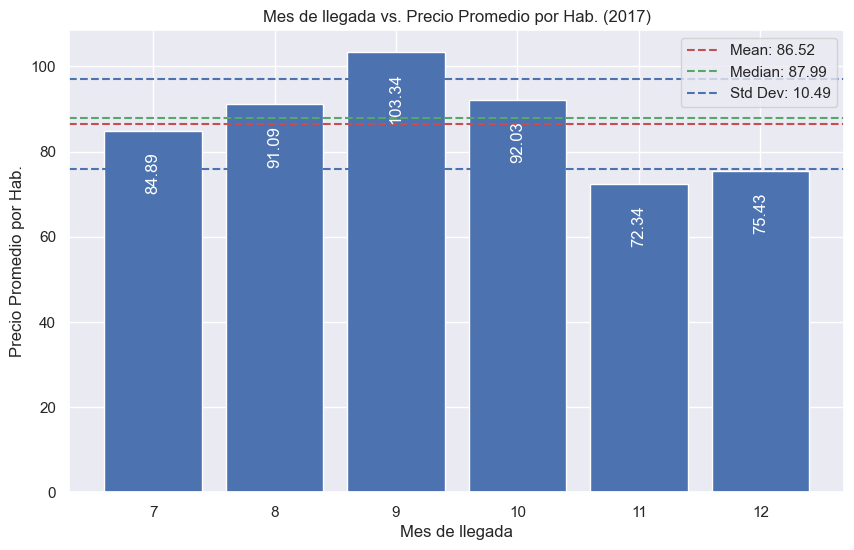

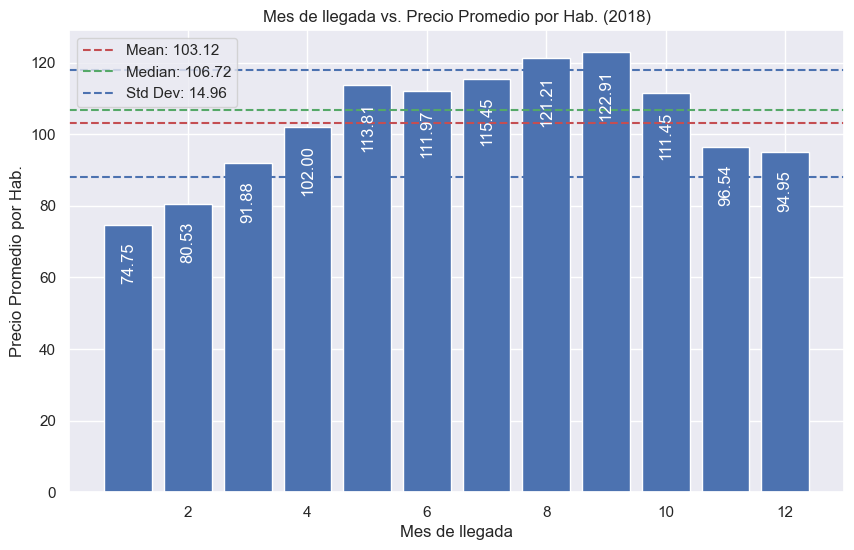

In [102]:
# Filtramos datos por año
data_2017 = data[data['arrival_year'] == 2017]
data_2018 = data[data['arrival_year'] == 2018]

# Agrupamos los datos por meses y calcular el precio medio
month_avg_price_2017 = data_2017.groupby('arrival_month')['avg_price_per_room'].mean()
month_avg_price_2018 = data_2018.groupby('arrival_month')['avg_price_per_room'].mean()

def plot_arrival_month_vs_avg_price(month_avg_price, year):
    mean_value = np.mean(month_avg_price.values)
    median_value = np.median(month_avg_price.values)  # Agrega la mediana
    std_value = np.std(month_avg_price.values)  # Agrega la desviación estándar
    
    bars = plt.bar(month_avg_price.index, month_avg_price.values)
    plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
    plt.axhline(y=median_value, color='g', linestyle='--', label=f'Median: {median_value:.2f}')  # Línea de la mediana
    plt.axhline(y=mean_value + std_value, color='b', linestyle='--', label=f'Std Dev: {std_value:.2f}')  # Línea de la desviación estándar
    plt.axhline(y=mean_value - std_value, color='b', linestyle='--')
    
    plt.legend()
    plt.xlabel('Mes de llegada')
    plt.ylabel('Precio Promedio por Hab.')
    plt.title(f'Mes de llegada vs. Precio Promedio por Hab. ({year})')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height - 5, f'{height:.2f}', ha='center', va='top', rotation=90, color='white')

    plt.show()


plot_arrival_month_vs_avg_price(month_avg_price_2017, 2017)
plot_arrival_month_vs_avg_price(month_avg_price_2018, 2018)



Hemos utilizado medidas de tendencia central para resaltar características importantes de los datos de precios promedio por habitación en función del año de llegada y el mes de llegada

 En el primer gráfico, que muestra la relación entre el año de llegada y el precio promedio por habitación, utilizamos la media (también conocida como promedio) como medida de tendencia central. La línea punteada roja representa la media, y nos indica el valor promedio de los precios por habitación para cada año específico. Al tener un punto de referencia central, podemos observar fácilmente si los precios promedio están por encima o por debajo de este valor para cada año, lo que puede ayudarnos a identificar tendencias a lo largo del tiempo.

 En el segundo gráfico, que muestra la relación entre el mes de llegada y el precio promedio por habitación para cada año (2017 y 2018), también utilizamos la media como medida de tendencia central, pero añadimos dos medidas adicionales: la mediana y la desviación estándar. La línea punteada roja representa la media, mientras que la línea punteada verde representa la mediana. La mediana es el valor central que divide la distribución en dos partes iguales, lo que nos ayuda a entender mejor la ubicación del "centro" de los datos. Además, utilizamos las líneas punteadas azules para representar la desviación estándar, que es una medida de dispersión o variabilidad de los datos con respecto a la media. Al observar la desviación estándar, podemos tener una idea de la amplitud de los precios promedio y cómo varían en cada mes.

 Estas medidas de tendencia central nos proporcionan información valiosa sobre la distribución y comportamiento de los precios promedio por habitación en función del año y el mes de llegada. Nos permiten comprender mejor la tendencia general, la variabilidad y la dispersión de los datos, lo que puede ayudarnos a tomar decisiones informadas y detectar patrones o comportamientos inusuales en los datos.

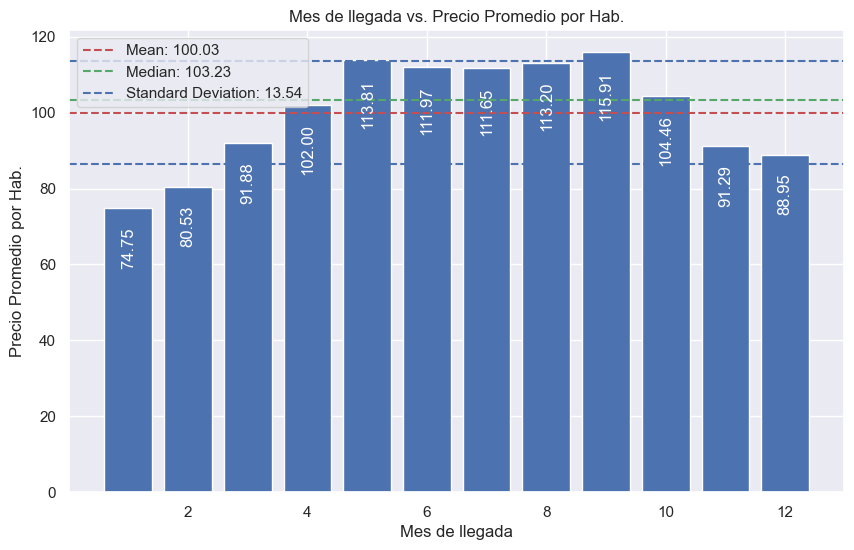

In [104]:
month_avg_price = data.groupby('arrival_month')['avg_price_per_room'].mean()

mean_value = np.mean(month_avg_price.values)
median_value = np.median(month_avg_price.values)
std_value = np.std(month_avg_price.values)

bars = plt.bar(month_avg_price.index, month_avg_price.values)
plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axhline(y=median_value, color='g', linestyle='--', label=f'Median: {median_value:.2f}')
plt.axhline(y=mean_value + std_value, color='b', linestyle='--', label=f'Standard Deviation: {std_value:.2f}')
plt.axhline(y=mean_value - std_value, color='b', linestyle='--')
plt.legend()
plt.xlabel('Mes de llegada')
plt.ylabel('Precio Promedio por Hab.')
plt.title('Mes de llegada vs. Precio Promedio por Hab.')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 5, f'{height:.2f}', ha='center', va='top', rotation=90, color='white')

plt.show()

Este grafico representa la variacion de precio promedio por habitacion a lo largo de los meses de llegada, en lugar de los años de llegada.

## Variacion de Precio Promedio a lo largo del año.

### Multivariado

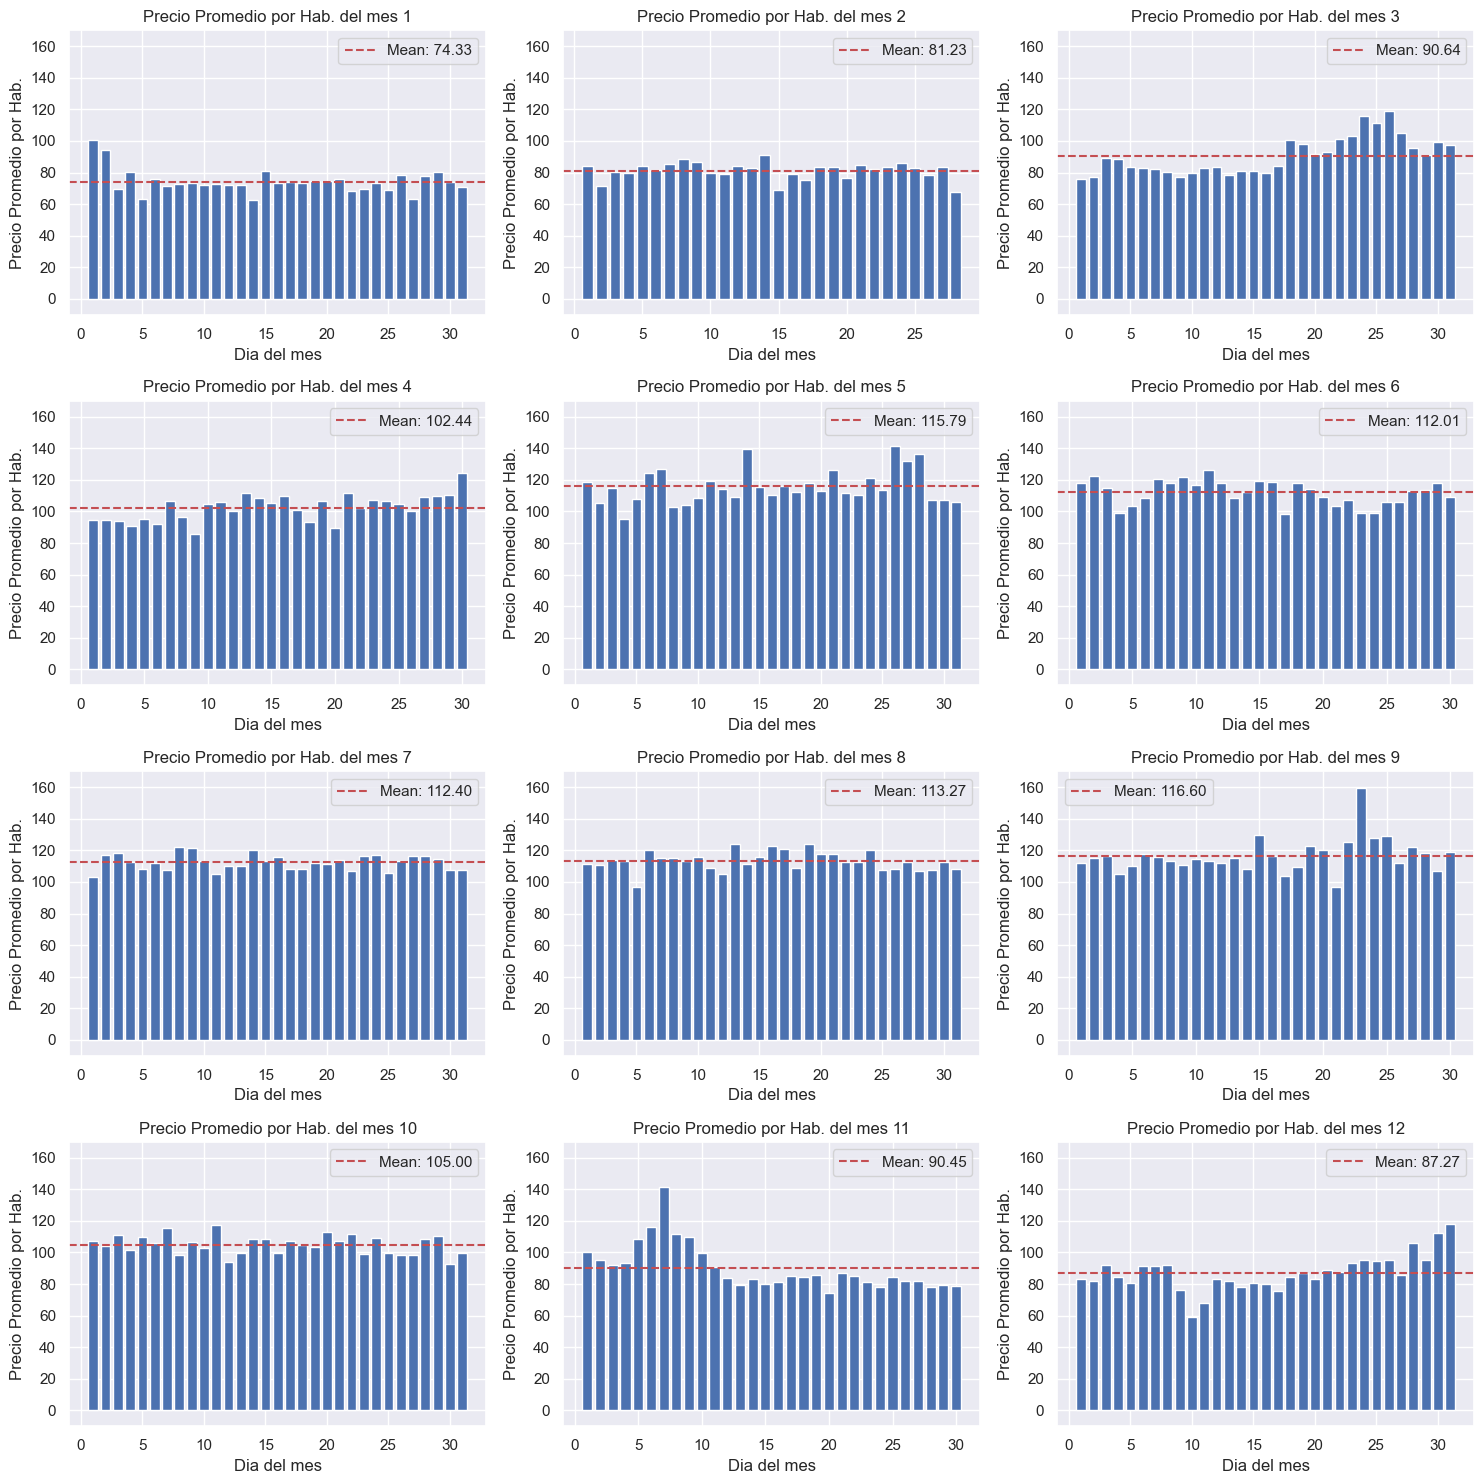

In [98]:
import numpy as np

# Función para crear gráficos de barras para cada mes
def plot_day_avg_price_subplot(ax, data, month, ylim):
    data_month = data[data['arrival_month'] == month]
    day_avg_price = data_month.groupby('arrival_date')['avg_price_per_room'].mean()
    
    mean_value = np.mean(day_avg_price.values)
    
    ax.bar(day_avg_price.index, day_avg_price.values)
    ax.axhline(y=mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
    ax.legend()
    ax.set_xlabel('Dia del mes')
    ax.set_ylabel('Precio Promedio por Hab.')
    ax.set_title(f'Precio Promedio por Hab. del mes {month}')
    ax.set_ylim(ylim)

# Parcela para cada mes en una cuadrícula
months = data['arrival_month'].unique()
sorted_months = sorted(months)
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.ravel()

# Establecemos un rango coherente para el eje Y
y_min = data['avg_price_per_room'].min() - 10
y_max = 170
ylim = (y_min, y_max)

for i, month in enumerate(sorted_months):
    plot_day_avg_price_subplot(axes[i], data, month, ylim)

plt.tight_layout()
plt.show()

Este gráfico permite comparar visualmente la variación del precio promedio por habitación a lo largo de los días del mes para cada mes en el conjunto de datos. Cada subgráfico muestra cómo fluctúan los precios promedio en un mes específico y permite identificar cualquier patrón o tendencia en la variación de los precios a lo largo de los días del mes.

### Heatmap (Correlacion de variables numericas) 

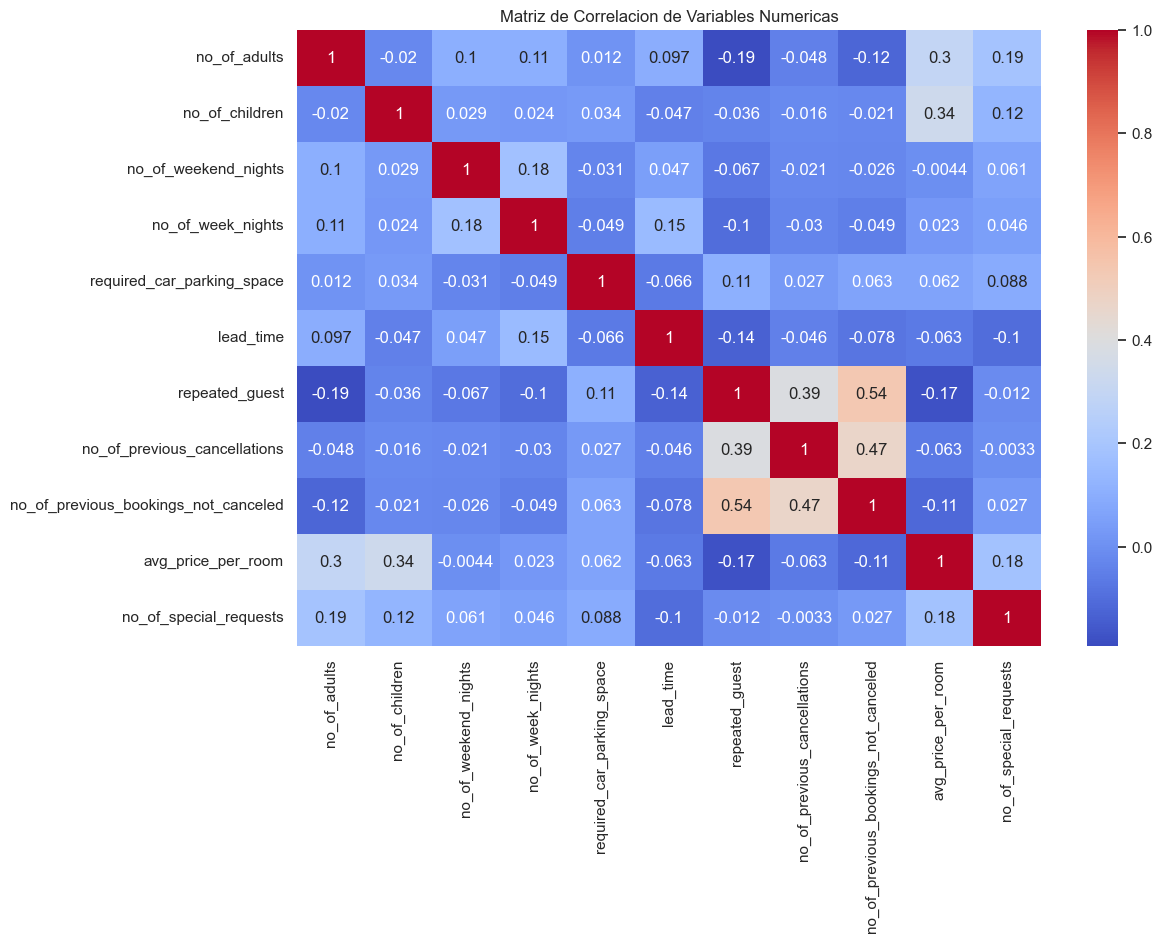

In [99]:
# Heatmap de la matriz de correlaciones
selected_numerical_features = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                               'no_of_week_nights', 'required_car_parking_space', 'lead_time',
                               'repeated_guest', 'no_of_previous_cancellations',
                               'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
                               'no_of_special_requests']

correlation_matrix = data[selected_numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlacion de Variables Numericas')
plt.show()


### Variacion del Precio Promedio por Habitacion, a lo largo del mes.

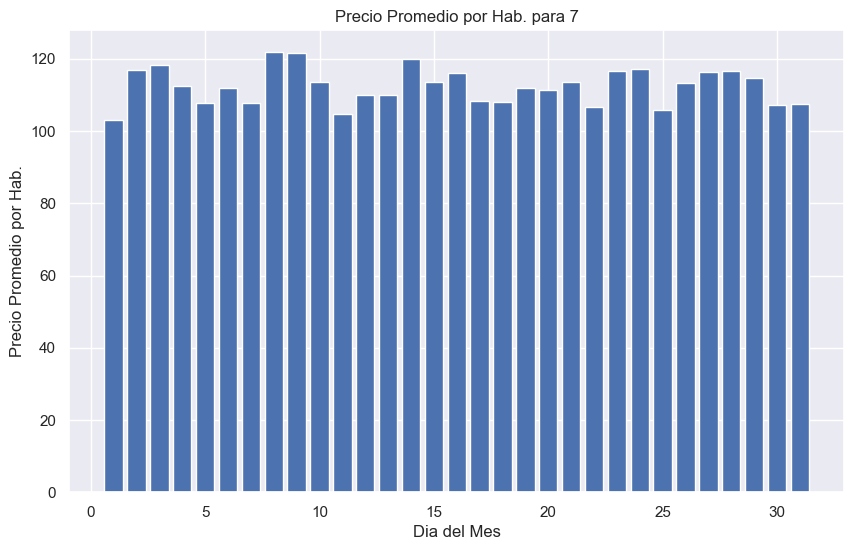

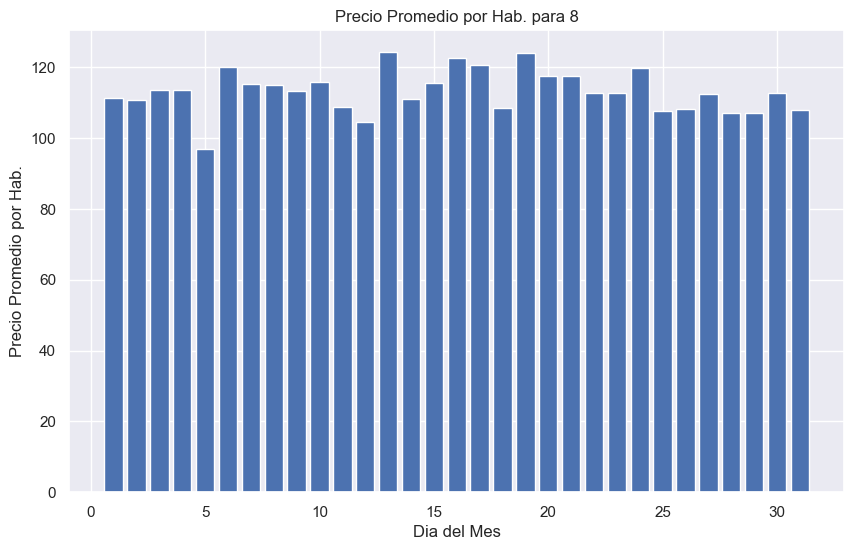

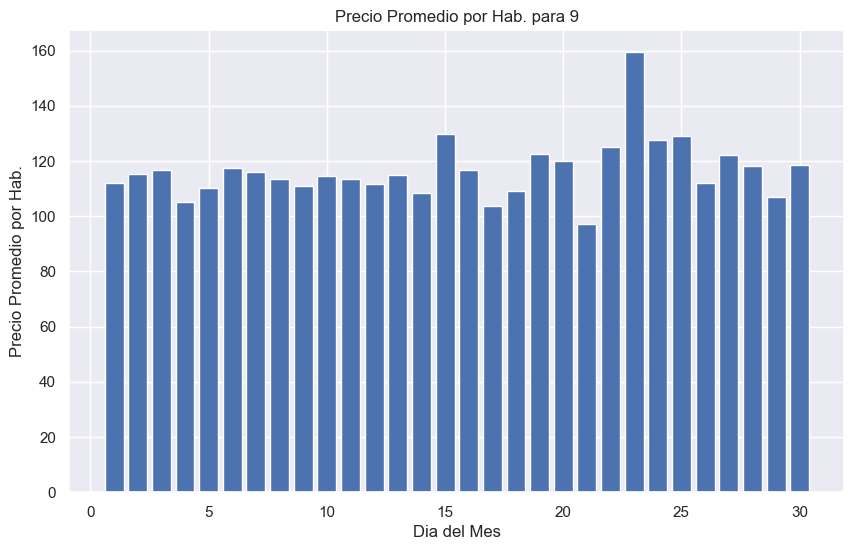

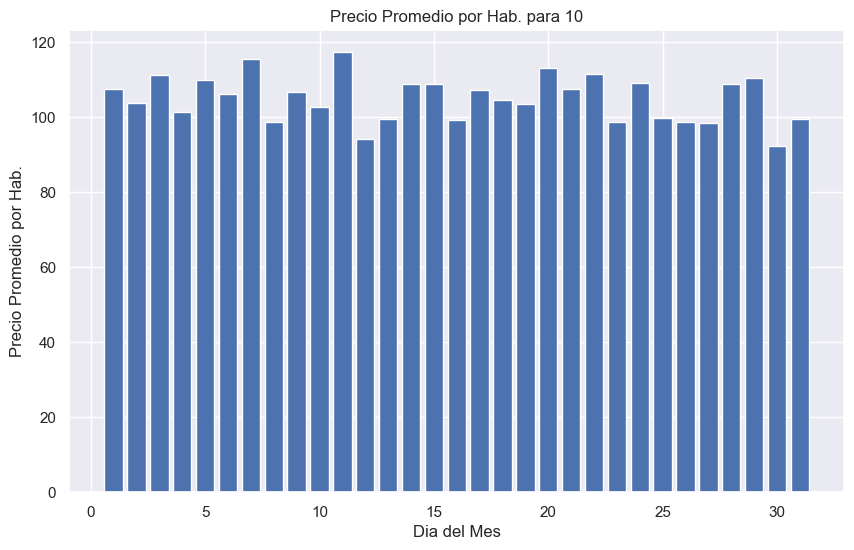

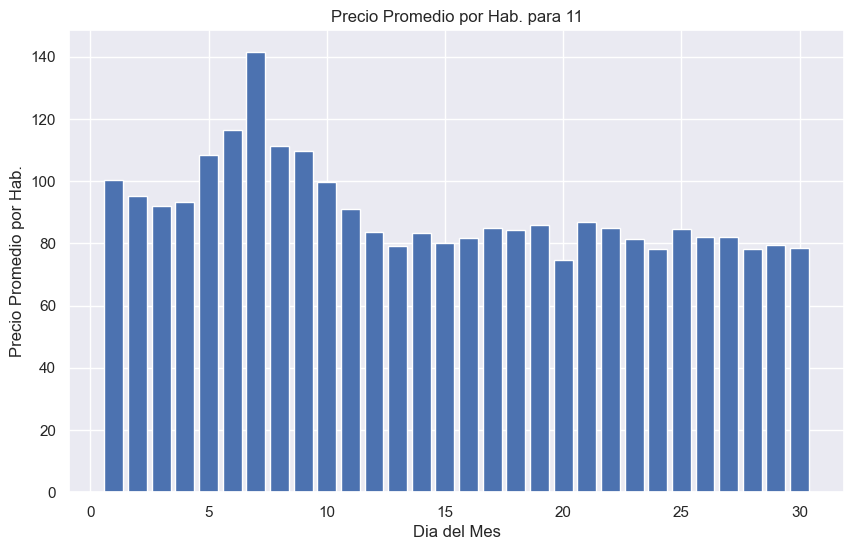

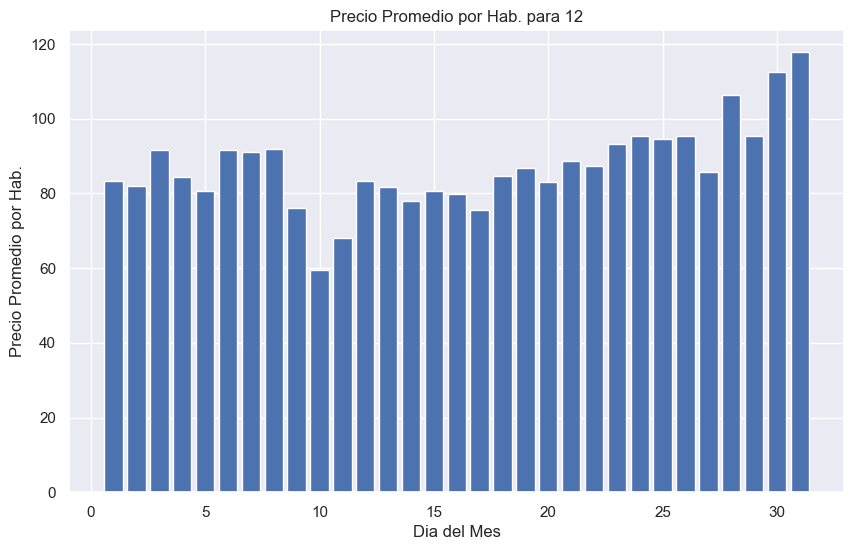

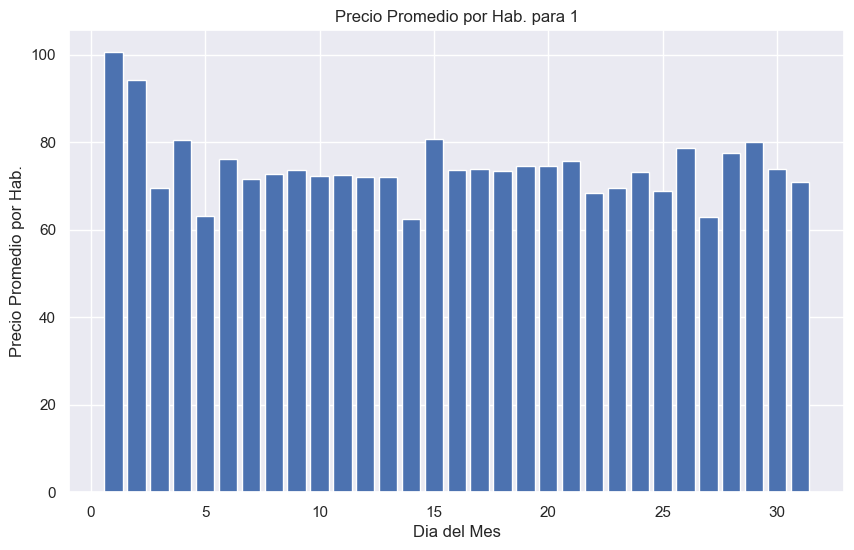

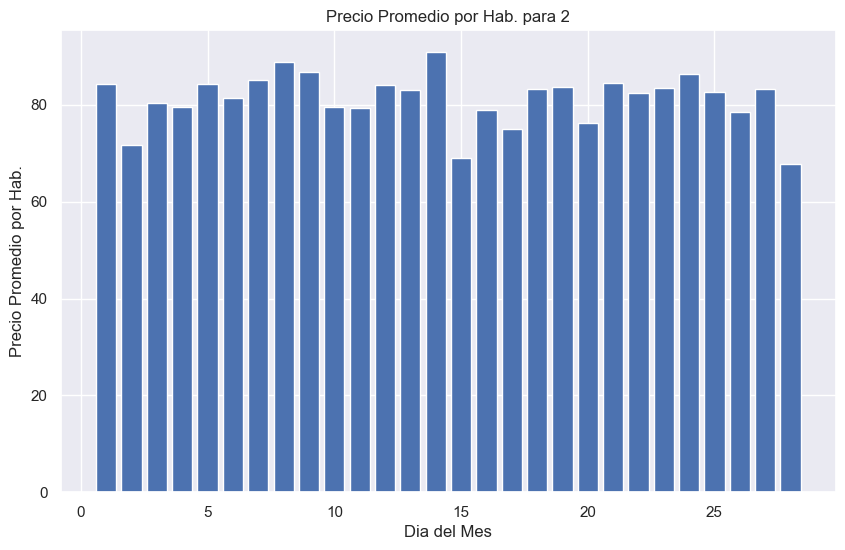

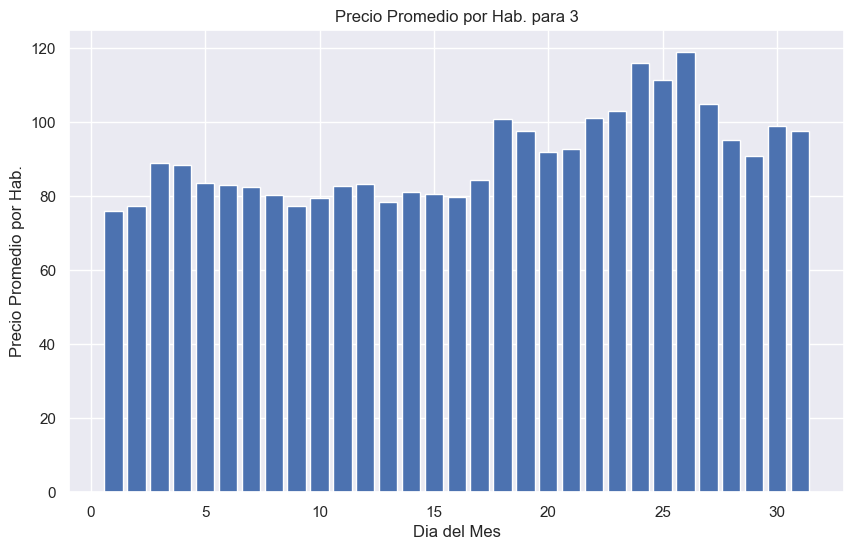

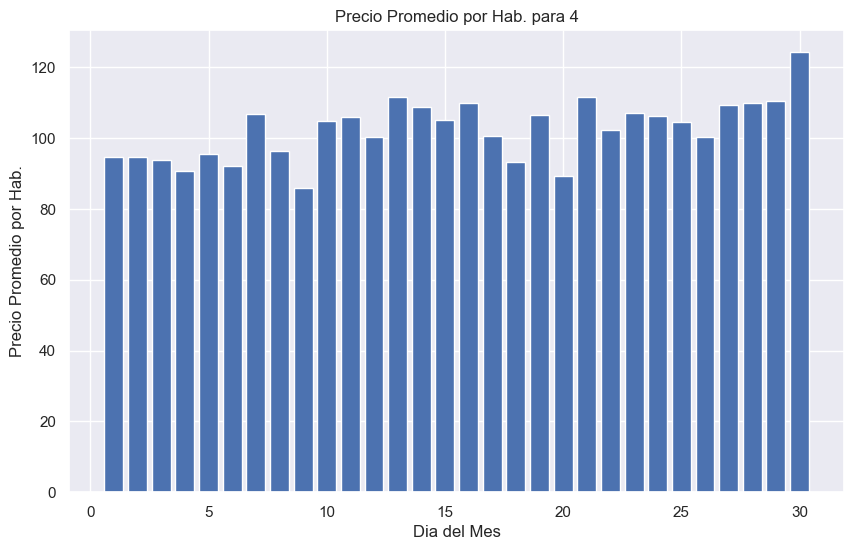

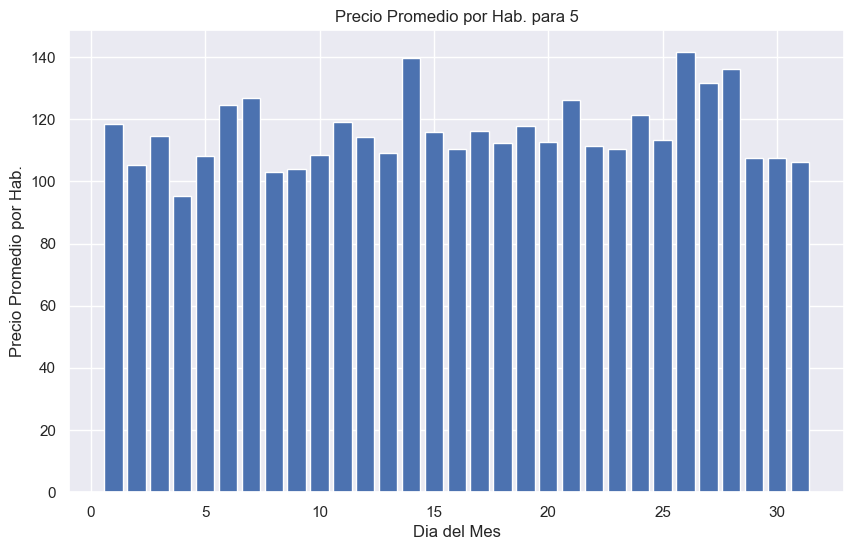

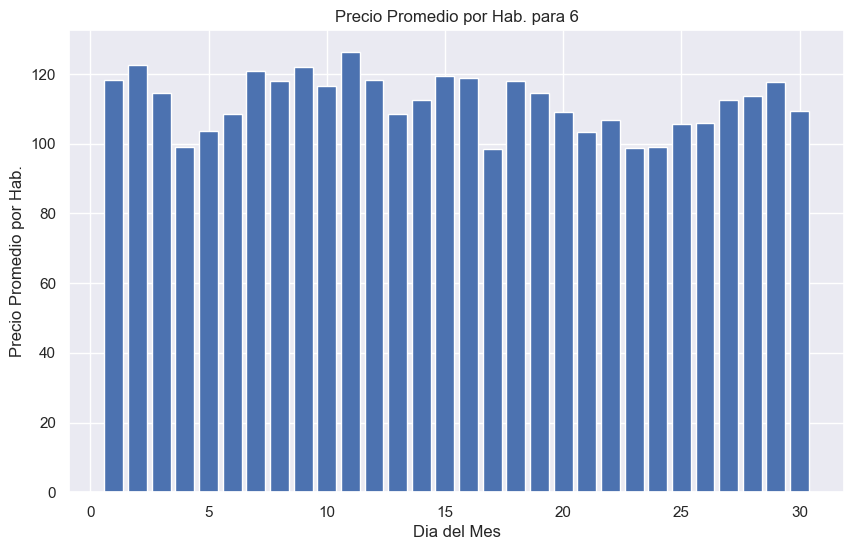

In [100]:
def plot_day_avg_price(data, month):
    data_month = data[data['arrival_month'] == month]
    day_avg_price = data_month.groupby('arrival_date')['avg_price_per_room'].mean()
    plt.bar(day_avg_price.index, day_avg_price.values)
    plt.xlabel('Dia del Mes')
    plt.ylabel('Precio Promedio por Hab.')
    plt.title(f'Precio Promedio por Hab. para {month}')
    plt.show()

# Parcela para cada mes
months = data['arrival_month'].unique()
for month in months:
    plot_day_avg_price(data, month)

# Ingenieria de Atributos

In [6]:
# Transformación de datos para crear una columna de fechas a partir de las columnas 'arrival_year', 'arrival_month' y 'arrival_date', elimina las filas que contienen valores nulos en la columna de fechas, establece la columna de fechas
data['date'] = pd.to_datetime(data['arrival_year'].astype(str) + '-' + data['arrival_month'].astype(str)
                              + '-' + data['arrival_date'].astype(str), errors='coerce')
data = data.dropna(subset=['date']).set_index('date').sort_index()

In [7]:
# Codificación one-hot de las columnas 'type_of_meal_plan', 'room_type_reserved' y 'market_segment_type' del DataFrame 'data', creando nuevas columnas binarias que representan cada categoría distinta en estas columnas.
data = pd.get_dummies(data, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])

In [8]:
X = data.drop(['booking_status', 'Booking_ID', 'arrival_year', 'arrival_month', 'arrival_date'], axis=1)
y = data['booking_status']

In [9]:
X = data.drop(['booking_status', 'Booking_ID', 'arrival_year', 'arrival_month', 'arrival_date'], axis=1)
y = data['booking_status']
y  = y.replace({"Not_Canceled": 0, "Canceled": 1})

In [10]:
# Método SelectKBest para seleccionar las mejores características en función de su importancia estadística (funcion f_classif).
best_features = SelectKBest(score_func=f_classif, k=10)
best_features.fit(X, y)
selected_features_idx = best_features.get_support(indices=True)
display(selected_features_idx)

array([ 0,  3,  4,  5,  6,  9, 10, 12, 24, 26], dtype=int64)

# Entrenamiento y Testeo

In [11]:
X = X.iloc[:, selected_features_idx]

In [12]:
for col in X.columns:
    _, p_value = shapiro(X[col])
    print(f"Shapiro-Wilk Test for '{col}': p-value = {p_value}")

Shapiro-Wilk Test for 'no_of_adults': p-value = 0.0
Shapiro-Wilk Test for 'no_of_week_nights': p-value = 0.0
Shapiro-Wilk Test for 'required_car_parking_space': p-value = 0.0
Shapiro-Wilk Test for 'lead_time': p-value = 0.0
Shapiro-Wilk Test for 'repeated_guest': p-value = 0.0
Shapiro-Wilk Test for 'avg_price_per_room': p-value = 0.0
Shapiro-Wilk Test for 'no_of_special_requests': p-value = 0.0
Shapiro-Wilk Test for 'type_of_meal_plan_Meal Plan 2': p-value = 0.0
Shapiro-Wilk Test for 'market_segment_type_Corporate': p-value = 0.0
Shapiro-Wilk Test for 'market_segment_type_Online': p-value = 0.0


In [13]:
# Factor de inflacion de la varianza
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                        features        VIF
0                   no_of_adults  10.712113
1              no_of_week_nights   3.381812
2     required_car_parking_space   1.064840
3                      lead_time   2.221100
4                 repeated_guest   1.262120
5             avg_price_per_room  10.228589
6         no_of_special_requests   1.942216
7  type_of_meal_plan_Meal Plan 2   1.295477
8  market_segment_type_Corporate   1.389287
9     market_segment_type_Online   4.283938


In [14]:
selected_features = vif[vif['VIF'] <= 5]['features']
X = X[selected_features]

In [15]:
test_size = int(0.3 * len(X))
train_size = len(X) - test_size
X_train = X[:train_size]
X_test = X[-test_size:]
y_train = y[:train_size]
y_test = y[-test_size:]

In [16]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

## Modelo con Regresion Logistica

In [17]:
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.449883
         Iterations 8


In [18]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25367
Model:                          Logit   Df Residuals:                    25358
Method:                           MLE   Df Model:                            8
Date:                Wed, 19 Jul 2023   Pseudo R-squ.:                  0.2663
Time:                        13:27:34   Log-Likelihood:                -11412.
converged:                       True   LL-Null:                       -15555.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.9671      0.053    -55.582      0.000      -3.072      -2.863
no_of_week_nights                 0.0618      0.012      5.325      0.000 

In [19]:
y_pred = (result.predict(X_test_sm) >= 0.5).astype(int)

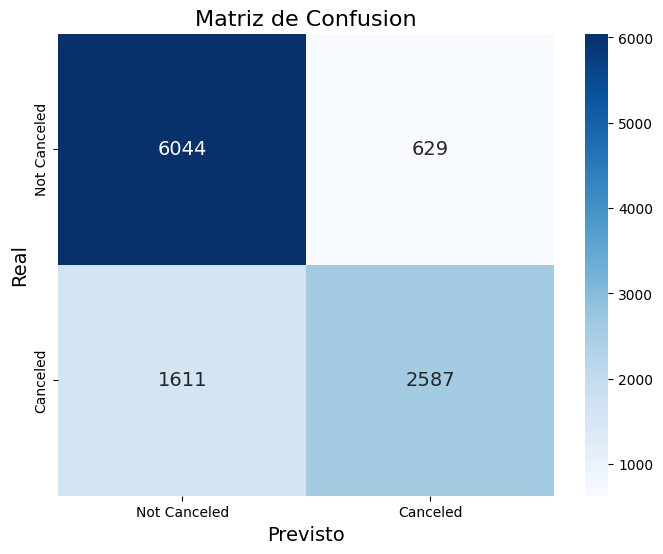

In [28]:
cm = confusion_matrix(y_test, y_pred)

# Trazamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14}, xticklabels=["Not Canceled", "Canceled"], yticklabels=["Not Canceled", "Canceled"])
plt.xlabel("Previsto", fontsize=14)
plt.ylabel("Real", fontsize=14)
plt.title("Matriz de Confusion", fontsize=16)
plt.show()

### Precision/Recall

In [29]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84      6673
           1       0.80      0.62      0.70      4198

    accuracy                           0.79     10871
   macro avg       0.80      0.76      0.77     10871
weighted avg       0.80      0.79      0.79     10871



Para la clase 0 (no cancelado), la precisión es del 79%, lo que indica que el 79% de las instancias clasificadas como clase 0 realmente pertenecen a la clase 0. Para la clase 1 (cancelado), la precisión es del 80%, lo que significa que el 80% de las instancias clasificadas como clase 1 son realmente de clase 1.

El recall (también conocido como tasa de verdaderos positivos) representa la proporción de instancias positivas que el modelo predijo correctamente. Para la clase 0, el recall es del 91%, lo que indica que el 91% de las instancias de la clase 0 fueron identificadas correctamente por el modelo. Para la clase 1, el recall es del 62%, lo que significa que solo el 62% de las instancias de la clase 1 fueron correctamente identificadas por el modelo.

El F1-score es una métrica que combina la precisión y el recall en una sola medida. Es útil cuando hay un desequilibrio de clases. Para la clase 0, el F1-score es 0.84, mientras que para la clase 1 es 0.70. Un F1-score más cercano a 1 es deseable, ya que indica un equilibrio entre precisión y recall.

El modelo parece tener un rendimiento decente en la clase 0, con una precisión y recall altos. Sin embargo, en la clase 1, aunque la precisión es alta, el recall es relativamente bajo, lo que sugiere que el modelo puede tener dificultades para identificar correctamente las instancias de la clase 1. 

## Modelo con K-Nearest Neighbour

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
from sklearn.metrics import accuracy_score

In [36]:
knn = KNeighborsClassifier().fit(X_train,y_train)
y_knn=knn.predict(X_test)

In [37]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_knn)
print("Precisión del modelo KNN:", accuracy)

Precisión del modelo KNN: 0.7437218287186091


De todas las muestras que el modelo intentó predecir en el conjunto de prueba, alrededor del 74.37% de ellas fueron clasificadas correctamente.

In [39]:
cm = confusion_matrix(y_test, y_knn)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[5759  914]
 [1872 2326]]


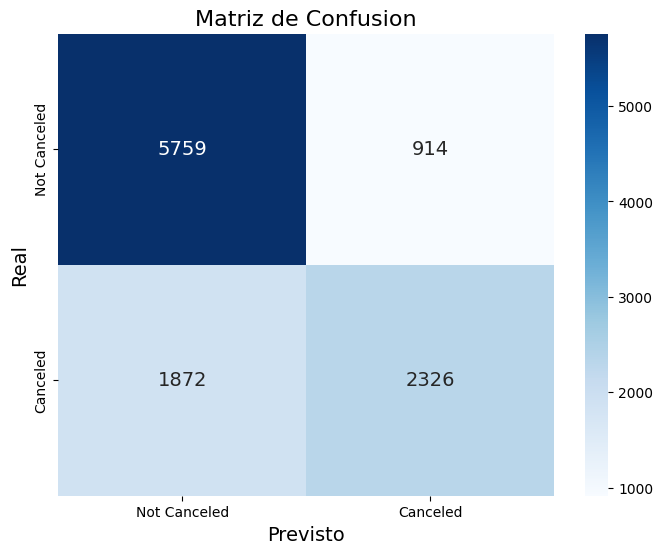

In [40]:
cm = confusion_matrix(y_test, y_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14}, xticklabels=["Not Canceled", "Canceled"], yticklabels=["Not Canceled", "Canceled"])
plt.xlabel("Previsto", fontsize=14)
plt.ylabel("Real", fontsize=14)
plt.title("Matriz de Confusion", fontsize=16)
plt.show()

In [41]:

report = classification_report(y_test, y_knn)
print("Reporte de clasificación:")
print(report)

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.75      0.86      0.81      6673
           1       0.72      0.55      0.63      4198

    accuracy                           0.74     10871
   macro avg       0.74      0.71      0.72     10871
weighted avg       0.74      0.74      0.74     10871



La precisión para la clase 0 (etiqueta 0) es 0.75, lo que significa que aproximadamente el 75% de las predicciones positivas son correctas. Para la clase 1 (etiqueta 1), la precisión es 0.72, lo que indica que alrededor del 72% de las predicciones positivas para esta clase son correctas.

El recall para la clase 0 es 0.86, lo que significa que el modelo logra capturar aproximadamente el 86% de todas las muestras reales de la clase 0. Para la clase 1, el recall es 0.55, lo que indica que el modelo solo puede capturar alrededor del 55% de todas las muestras reales de la clase 1.

El reporte de clasificación revela que el modelo tiene un rendimiento moderado en términos de precisión, recall y F1-score. Es posible que puedas mejorar el rendimiento ajustando los hiperparámetros del modelo.

# Optimizacion

In [42]:
from sklearn.model_selection import GridSearchCV


knn = KNeighborsClassifier()

# Definimos los hiperparámetros que deseas ajustar y sus respectivos valores
param_grid = {
    'n_neighbors': [3, 5, 7],        # Número de vecinos
    'weights': ['uniform', 'distance'],  # Función de peso para la votación de vecinos
    'p': [1, 2]                       # Parámetro de potencia para la distancia (1: distancia de Manhattan, 2: distancia euclidiana)
}

# Realizamos Grid Search con validación cruzada para encontrar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtenemos los mejores hiperparámetros encontrados por Grid Search
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtenemos el modelo con los mejores hiperparámetros
best_knn = grid_search.best_estimator_

# Realizamos predicciones en el conjunto de prueba con el modelo ajustado
y_pred = best_knn.predict(X_test)

# Evaluamos el rendimiento del modelo ajustado
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo KNN ajustado:", accuracy)

Mejores hiperparámetros: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Precisión del modelo KNN ajustado: 0.7463894765890903


Parece que el ajuste de hiperparámetros ha mejorado ligeramente el rendimiento del modelo KNN. Los mejores hiperparámetros encontrados por Grid Search son {'n_neighbors': 7, 'p': 1, 'weights': 'distance'} y la precisión del modelo ajustado es de aproximadamente 0.7464 (o 74.64%).

### Comparacion y conclusion

En términos de precisión, el modelo de Regresión Logística tiene un rendimiento ligeramente mejor que el modelo KNN (79% frente al 74%). Esto significa que el modelo de Regresión Logística clasifica más instancias correctamente en el conjunto de prueba.

En cuanto al recall, el modelo de Regresión Logística tiene un recall más alto para ambas clases en comparación con el modelo KNN. Esto indica que el modelo de Regresión Logística es mejor para capturar positivos reales (clase 1) y negativos reales (clase 0).

El F1-score, que es una medida que combina precisión y recall, también es más alto para el modelo de Regresión Logística en ambas clases, lo que sugiere un equilibrio entre precisión y recall en ese modelo.

Basándonos en estos reportes, el modelo de Regresión Logística parece tener un mejor rendimiento que el modelo KNN para el problema en cuestión.

In [23]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
date,,,,,,,,,,,,,,,,,,,,,
2017-07-01,INN09777,2,0,0,2,0,257,2017,7,1,...,0,0,0,0,0,0,0,0,1,0
2017-07-01,INN26322,2,0,0,2,0,257,2017,7,1,...,0,0,0,0,0,0,0,0,1,0
2017-07-01,INN06451,2,0,0,2,0,257,2017,7,1,...,0,0,0,0,0,0,0,0,0,1
2017-07-01,INN08763,1,0,0,2,0,257,2017,7,1,...,0,0,0,0,0,0,0,0,1,0
2017-07-01,INN13728,2,0,0,2,0,257,2017,7,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,INN10760,2,0,2,1,0,331,2018,12,31,...,0,0,0,0,0,0,0,0,0,1
2018-12-31,INN30099,2,0,2,2,0,240,2018,12,31,...,0,0,0,0,0,0,0,0,0,1
2018-12-31,INN10666,2,1,2,2,0,42,2018,12,31,...,0,0,0,0,0,0,0,0,0,1


In [37]:
test_size = int(0.3 * len(X))
train_size = len(X) - test_size

X_train = X[:train_size]
X_test = X[-test_size:]
y_train = y[:train_size]
y_test = y[-test_size:]

In [38]:
X_train

,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_special_requests,type_of_meal_plan_Meal Plan 2,market_segment_type_Corporate,market_segment_type_Online
date,,,,,,,,
2017-07-01,2,0,257,0,0,1,0,0
2017-07-01,2,0,257,0,0,1,0,0
2017-07-01,2,0,257,0,0,1,0,1
2017-07-01,2,0,257,0,0,1,0,0
2017-07-01,2,0,257,0,0,1,0,0
...,...,...,...,...,...,...,...,...
2018-08-31,4,0,144,0,1,0,0,1
2018-08-31,3,0,44,0,0,1,0,1
2018-08-31,3,0,44,0,1,0,0,1


In [39]:
X_test['predictions'] = y_pred 

In [40]:
X_test['booking_status'] = y_test
# Agrupamos por el índice y sumar la columna "predicciones"
grouped_data = X_test.groupby('date').agg({'predictions': 'sum', 'booking_status': 'sum'}).reset_index()


grouped_data.head(50)

,date,predictions,booking_status
0,2018-08-31,35,36
1,2018-09-01,24,25
2,2018-09-02,32,38
3,2018-09-03,34,36
4,2018-09-04,22,36
5,2018-09-05,37,43
6,2018-09-06,24,34
7,2018-09-07,18,18
8,2018-09-08,48,88
9,2018-09-09,31,39


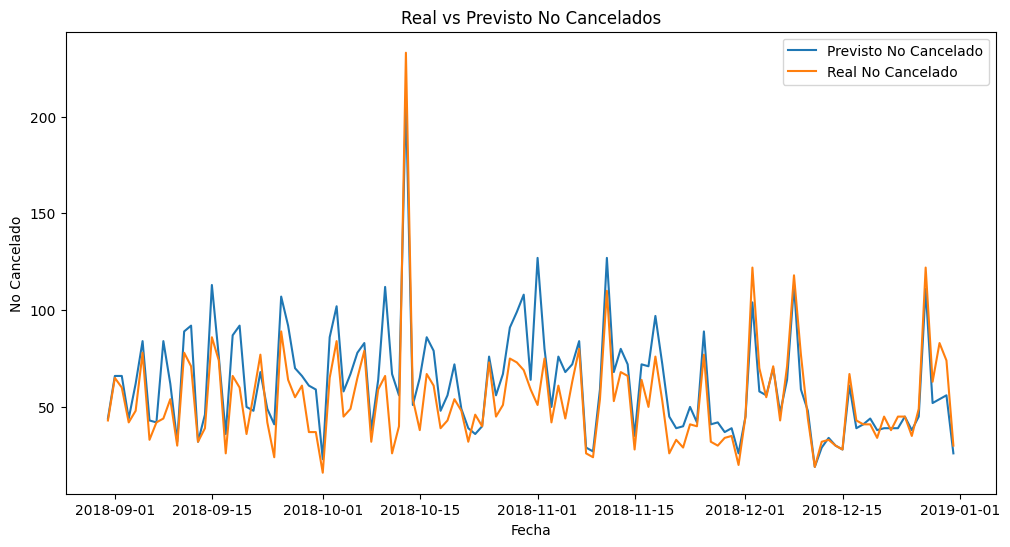

In [41]:
# Creamos un nuevo DataFrame con la fecha, las predicciones y booking_status
data_with_date = X_test.copy()
data_with_date['predictions'] = y_pred
data_with_date['booking_status'] = y_test.values

# Contamos el número de reservas no canceladas (0) en las predicciones y en los datos reales.
data_with_date['not_cancelled_predictions'] = data_with_date['predictions'].apply(lambda x: 1 if x == 0 else 0)
data_with_date['not_cancelled_actual'] = data_with_date['booking_status'].apply(lambda x: 1 if x == 0 else 0)

# Agrupamos por fecha y sumar las columnas not_cancelled_predictions y not_cancelled_actual
grouped_data_agg = data_with_date.groupby('date').agg({'not_cancelled_predictions': 'sum', 'not_cancelled_actual': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(grouped_data_agg['date'], grouped_data_agg['not_cancelled_predictions'], label='Previsto No Cancelado')
plt.plot(grouped_data_agg['date'], grouped_data_agg['not_cancelled_actual'], label='Real No Cancelado')

plt.xlabel('Fecha')
plt.ylabel('No Cancelado')
plt.title('Real vs Previsto No Cancelados')
plt.legend()

plt.show()

# Comentarios
Las predicciones de "No cancelados" siguen de cerca los datos reales, con solo pequeñas desviaciones, esto indica que el modelo es preciso en sus predicciones. Sin embargo, hay una discrepancia significativa entre las dos líneas, puede ser necesario revisar y mejorar el modelo de predicción para los datos de "No cancelados".

Hay patrones repetitivos o estacionales en los datos de "No cancelados" predichos y los datos reales. Esto puede ser útil para comprender las fluctuaciones esperadas en los datos de "No cancelados" a lo largo del tiempo y tomar medidas adecuadas en consecuencia.

Puede ser útil examinar factores externos o eventos específicos que puedan haber influido en los datos de "No cancelados" y que no fueron capturados por el modelo de predicción.

En resumen, este gráfico proporciona una visualización para comparar los datos de "No cancelados" predichos con los datos reales a lo largo del tiempo. Permite evaluar la precisión del modelo de predicción, identificar patrones estacionales y analizar las discrepancias entre las predicciones y los datos reales de "No cancelados".

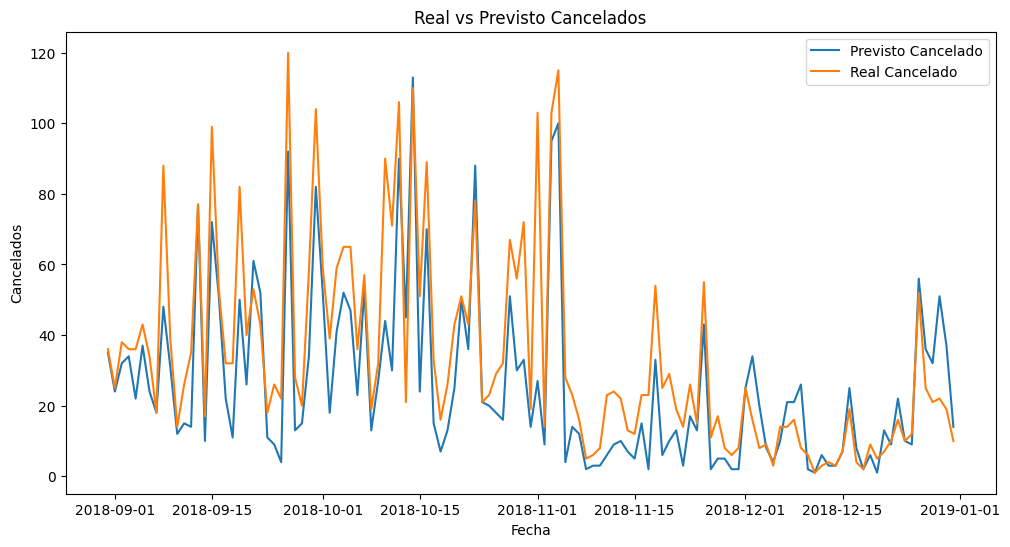

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_data['date'], grouped_data['predictions'], label='Previsto Cancelado')
plt.plot(grouped_data['date'], grouped_data['booking_status'], label='Real Cancelado')

plt.xlabel('Fecha')
plt.ylabel('Cancelados')
plt.title('Real vs Previsto Cancelados')
plt.legend()

plt.show()

## Conclusiones
 
Al comparar las líneas, podemos evaluar la precisión del modelo de predicción. Si las cancelaciones predichas siguen de cerca las cancelaciones reales, con solo pequeñas desviaciones, esto indica que el modelo es preciso en sus predicciones. Sin embargo, si hay una discrepancia significativa entre las dos líneas, puede ser necesario revisar y mejorar el modelo de predicción.

Se encuentran patrones repetitivos o estacionales en las cancelaciones reales y las predicciones. Por ejemplo, hay un aumento en las cancelaciones en ciertos meses o días de la semana, se podrian tomar medidas adecuadas para gestionar y anticiparse a esas tendencias estacionales.

Hay diferencias notables entre las cancelaciones reales y las predichas en ciertos puntos. Puede ser útil analizar factores externos o eventos específicos que puedan haber influido en las cancelaciones y que no fueron capturados por el modelo de predicción.

En general, este gráfico proporciona una visualización útil para comparar las cancelaciones reales con las predichas y evaluar la precisión del modelo de predicción a lo largo del tiempo.




